## Extraction of BG from images.

In [ ]:
# Imports
import sys, os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# setting path
sys.path.append('../Preprocessing')
sys.path.append('MedianFilter')
sys.path.append('PercentileFilter')
from preproc import beautify_frame
from median_image import median_filter
from percentile import percentile_filter
from dask.distributed import Client
# Start a client using all CPUs of this machine
client = Client()
client


<Client: 'tcp://127.0.0.1:54992' processes=4 threads=12, memory=32.00 GiB>

2025-02-18 09:05:44,576 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 5 memory: 36 MB fds: 179>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/imaging/lib/python3.11/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
          ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/imaging/lib/python3.11/site-packages/distributed/system_monitor.py", line 168, in update
    net_ioc = psutil.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/imaging/lib/python3.11/site-packages/psutil/__init__.py", line 2139, in net_io_counters
    rawdict = _psplatform.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 12] Cannot allocate memory
2025-02-18 16:41:32,494 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 6 memory: 44 MB fds: 181>>
Traceback (most recent call last):
  Fil

#### Single frame - Median

Images successfully loaded


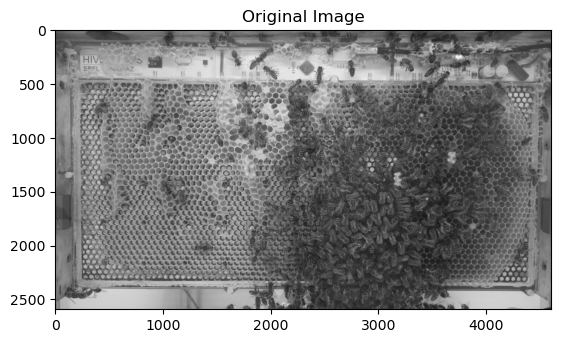

Images successfully preprocessed


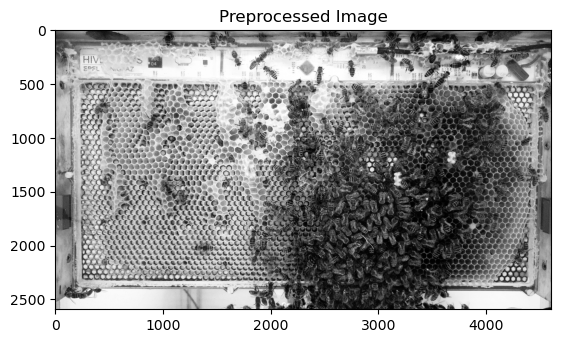

/opt/anaconda3/envs/imaging/lib/python3.11/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 341.73 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


True

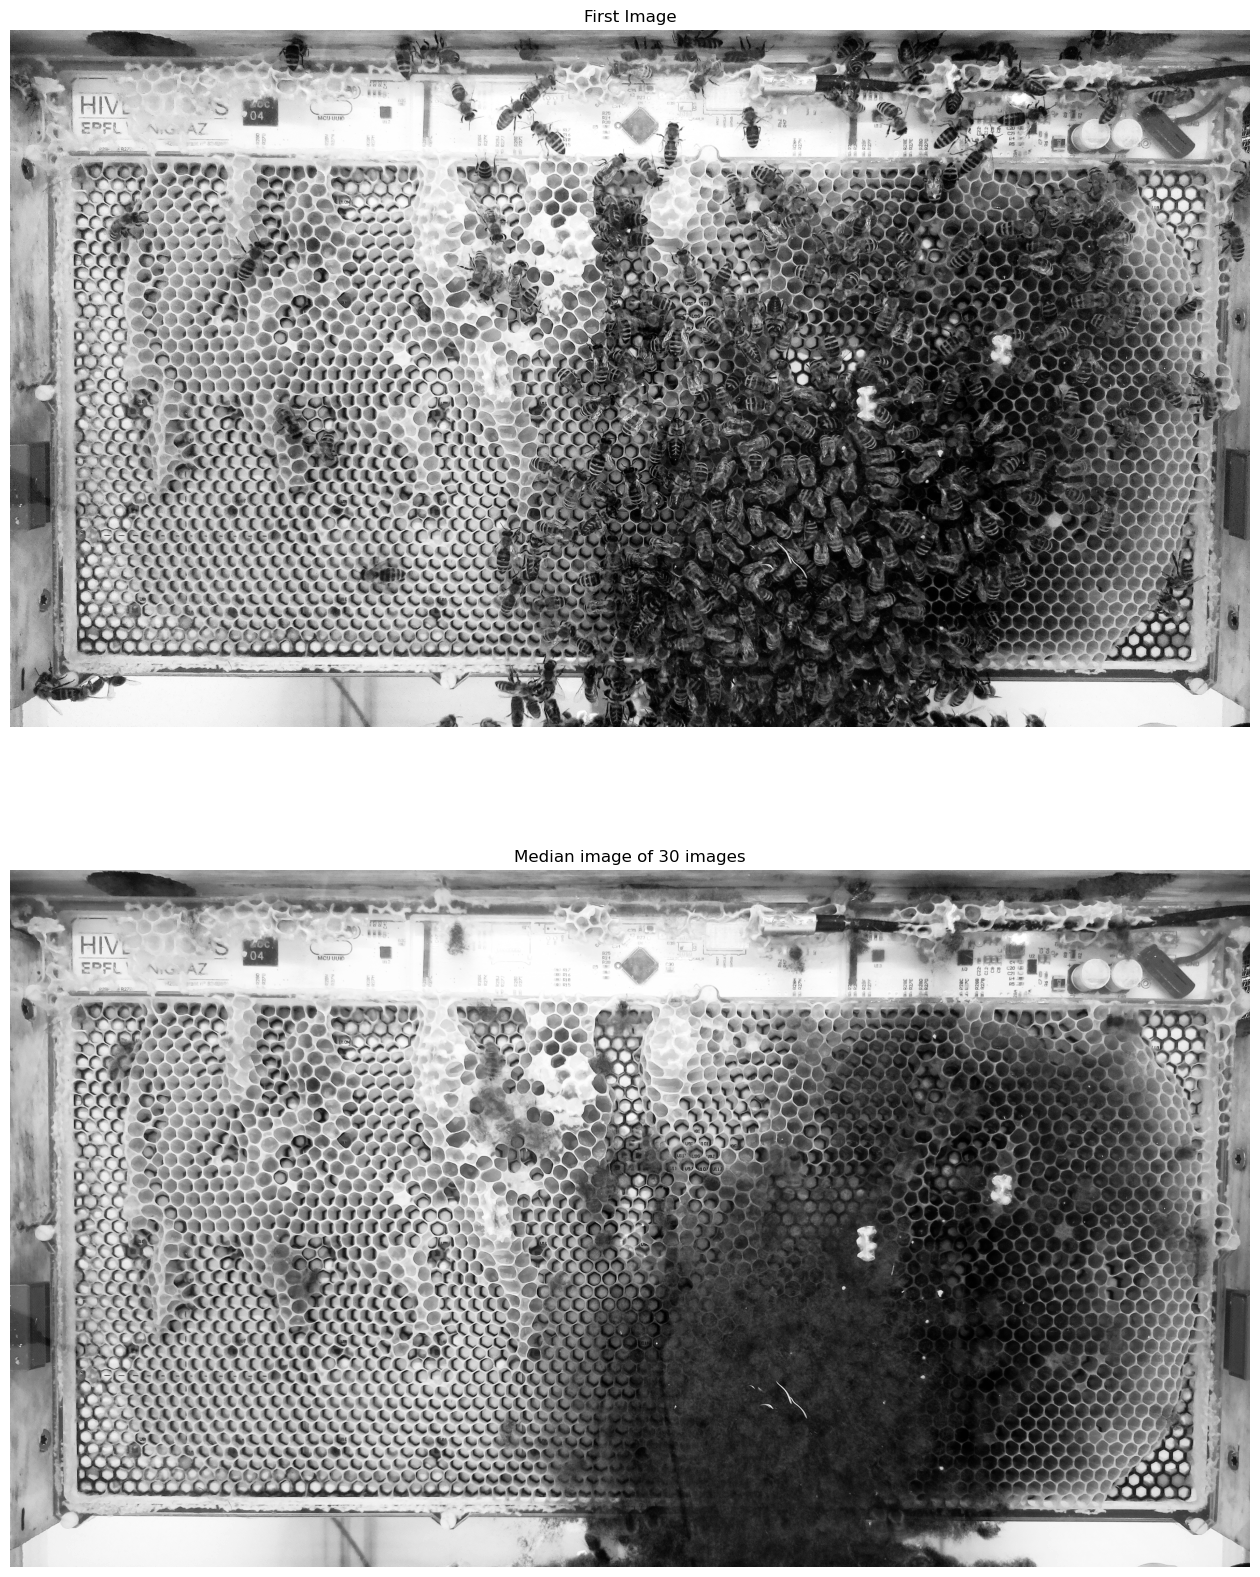

In [2]:
START_INDEX = 6000 # The index of the image to use

# Median filter parameters
NUMB_IMAGES = 30 # Number of images to use for foreground removal

img_path = '/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/24.11_aSensing_OH/Images/h1r1_1minute/' # This is a folder with thousands of images. Edit to your path
# Get the list of images
files = os.listdir(img_path)
files.sort()
files = files[START_INDEX:START_INDEX+NUMB_IMAGES]
images = [cv.imread(img_path+file, cv.IMREAD_GRAYSCALE) for file in files]
print("Images successfully loaded")

# show the first image
plt.imshow(images[0], cmap='gray')
plt.title('Original Image')
plt.show()

# Preprocess the images
images = [beautify_frame(img) for img in images]
print("Images successfully preprocessed")

# show the first pp image
plt.imshow(images[0], cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Median filter the images
median_image = median_filter(images)

# Create a subplot
plt.figure(figsize=(16, 20))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.imshow(images[0], cmap='gray')
plt.title('First Image')
plt.axis('off')

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.imshow(median_image, cmap='gray')
plt.title('Median image of %d images' % NUMB_IMAGES)
plt.axis('off')

# Save median image
cv.imwrite('median_image.png', median_image)


#### Single frame - Percentile

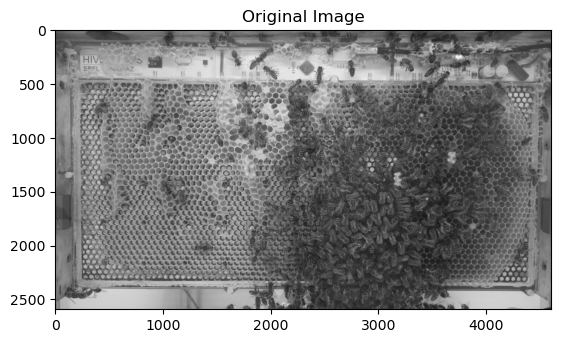

Images successfully preprocessed


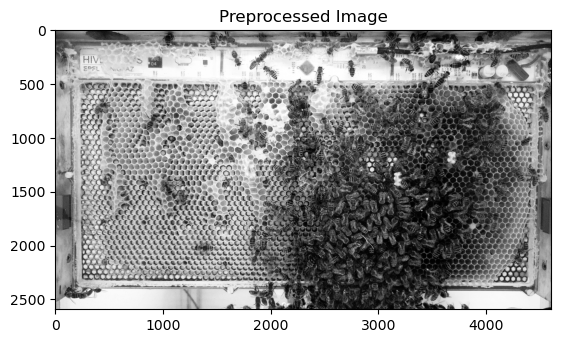

Indexes:  range(6000, 6001, 180)
Dask images:  dask.array<_map_read_frame, shape=(36390, 2592, 4608, 3), dtype=uint8, chunksize=(1, 2592, 4608, 3), chunktype=numpy.ndarray>
Image dimensions:  2592 4608
Indexes:  range(6000, 6001, 180)
Dask images:  dask.array<_map_read_frame, shape=(36390, 2592, 4608, 3), dtype=uint8, chunksize=(1, 2592, 4608, 3), chunktype=numpy.ndarray>
Image dimensions:  2592 4608
Indexes:  range(6000, 6001, 180)
Dask images:  dask.array<_map_read_frame, shape=(36390, 2592, 4608, 3), dtype=uint8, chunksize=(1, 2592, 4608, 3), chunktype=numpy.ndarray>
Image dimensions:  2592 4608
Indexes:  range(6000, 6001, 180)
Dask images:  dask.array<_map_read_frame, shape=(36390, 2592, 4608, 3), dtype=uint8, chunksize=(1, 2592, 4608, 3), chunktype=numpy.ndarray>
Image dimensions:  2592 4608


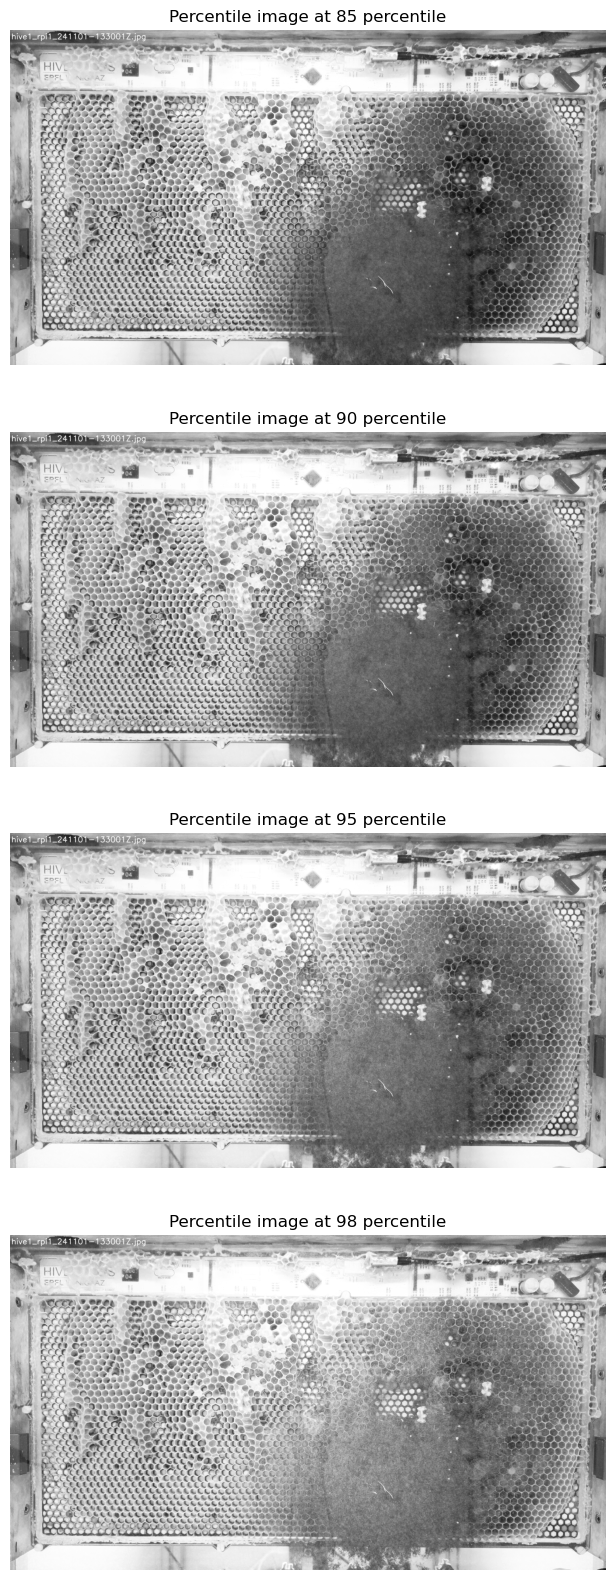

2025-02-17 18:51:55,535 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 2 memory: 25 MB fds: 31>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/imaging/lib/python3.11/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
          ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/imaging/lib/python3.11/site-packages/distributed/system_monitor.py", line 168, in update
    net_ioc = psutil.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/imaging/lib/python3.11/site-packages/psutil/__init__.py", line 2139, in net_io_counters
    rawdict = _psplatform.net_io_counters()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 12] Cannot allocate memory
2025-02-17 20:08:12,008 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 2 memory: 28 MB fds: 31>>
Traceback (most recent call last):
  File 

In [ ]:
IMG_INDEX = 6000 # The index of the image to use

# percentile filter substack parameters
filter_length = 40
percentile = [85,90,95,98]
frame_skip = 2
step = 180

img_path = '/Users/cyrilmonette/Library/CloudStorage/SynologyDrive-data/24.11_aSensing_OH/Images/h1r1_1minute/' # This is a folder with thousands of images. Edit to your path
# Get the list of images
files = os.listdir(img_path)
files.sort()

image = cv.imread(img_path+files[IMG_INDEX], cv.IMREAD_GRAYSCALE)
# show the first image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Preprocess the image
image = beautify_frame(image)
print("Images successfully preprocessed")

# show the pp image
plt.imshow(image, cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Percentile filter the images around the image at index IMG_INDEX
percentile_images = [percentile_filter(img_path, IMG_INDEX, IMG_INDEX+1, step = step, frame_skip = frame_skip, filter_length = filter_length, percentile = p)[0] for p in percentile]

# Create a subplot
plt.figure(figsize=(16, 20))

plt.subplot(4, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.imshow(percentile_images[0], cmap='gray')
plt.title('Percentile image at %d percentile' % percentile[0])
plt.axis('off')

plt.subplot(4, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.imshow(percentile_images[1], cmap='gray')
plt.title('Percentile image at %d percentile' % percentile[1])
plt.axis('off')

plt.subplot(4, 1, 3)  # 2 rows, 1 column, 3rd subplot
plt.imshow(percentile_images[2], cmap='gray')
plt.title('Percentile image at %d percentile' % percentile[2])
plt.axis('off')

plt.subplot(4, 1, 4)  # 2 rows, 1 column, 4th subplot
plt.imshow(percentile_images[3], cmap='gray')
plt.title('Percentile image at %d percentile' % percentile[3])
plt.axis('off')

# Save all images individually, they are dask arrays
for i, img in enumerate(percentile_images):
    # Load the dask array as a numpy array
    np_img = np.array(img) # Convert from Dask array to numpy array
    cv.imwrite('percentile_image_%d.png' % percentile[i], np_img)

